<a href="https://colab.research.google.com/github/anamika-ds/music-recommender/blob/main/Music_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎵 **Music recommender system**

## 📜 **Problem Statement**




Let's consider we have an online music store. When our users sign up, we ask their age and gender, and based on their profile we recommend various music albums they're likely to buy. So in this project, we want to use machine learning to increase the sales. Thus, we build a ML model. We feed this model with some sample data. Based on the existing users our model will learn the patterns in our data so we can ask it to make predictions when a user signs up we tell our model.

## Solution

#### Importing data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving music.csv to music.csv


In [2]:
import pandas as pd
music_data = pd.read_csv('music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


#### Preparing data

The dataset doesn't contain any duplicates or null values so is usuable. But, we need to split it into input table and output table using **drop()**.

In [3]:
x = music_data.drop(columns=['genre'])
y = music_data['genre']


#### Learning and predicting

Building a machine learning model using an algorithm called **Decision tree**. We do not have to explicitly programme these algorithms as they are already present in the libraries like scikit-learn.

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x, y)
predictions = model.predict([ [21, 1], [22, 0] ])
predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

*sklearn* is the **package**, *.tree* is the **module** and *DecisionTreeClassifier*
is the **class** that implements the decision tree algorithm.

#### Calculate the accuracy

Right now, we are passing the entire data for training the dataset **model.fit(X, Y)** and using two samples to make predictions i.e., [ [21,1], [22,0] ]. This is not enough to calculate the accuracy.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = music_data.drop(columns=['genre'])
y = music_data['genre']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)
predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions)
score

1.0

train_test_split(x, y, test_size=0.2) returns **a tuple** and can be unpacked into x_train, x_test, y_train, y_test (*4 variables*). First two variables are the input sets and the other two are the output sets for training and testing respectively.
Instead of passing the entire dataset, we *pass only the training dataset model*.fit(x_train, y_train).
The accuracy score ranges from 0 -> 1. Running it different times will give different score as it **randomly picks** data for training and testing.


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

model.fit(x_train, y_train)
predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions)
score

0.3333333333333333

The score is pretty bad when test_size is changed to **0.8** as there is very little data to train the model. The more data we give the model and the more cleaner it is, the better the results are.

### Persisting models & Visualizing decision tree


We import our dataset, create a model, train it and then ask it to make predictions. Now, the piece of code that we wrote above is not what we want to run every time we have a new user nor we want to make recommendations to an existing user. This is because training a model can sometimes be really time consuming. In this example, we're dealing with a very small dataset that has only 20 records but in real applications we might have a dataset with thousands or millions of samples training a model for that might take seconds, minutes or even hours so that is why model persistence is important. Once in a while we build and train our model and then we'll save it to a file. Now next time we want to make predictions we simply load the model from the file and ask it to make predictions that model is already trained we don't need to retrain it, it's like an intelligent person.

In [7]:
!pip install joblib

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

music_data = pd.read_csv('music.csv')
x = music_data.drop(columns=['genre'])
y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(x, y)
joblib.dump(model, 'music-recommender.joblib')

['music-recommender.joblib']

**joblib** has methods of saving and loading models. Usually, While working on a jupyter notebook, below sysntax is used.


```
from sklearn.externals import joblib
model = ... #trained model
model = joblib.load('model_name.joblib') #creates a file and loads at the same time
predictions = model.predict([ [21,1] ])
predictions
```

But for google colab,


```
import joblib
joblib.dump(model, 'file_path') #save the file in the drive
model = joblib.load('file_path') #load the file
```



In [11]:
model = joblib.load('music-recommender.joblib')
predictions = model.predict([ [30,1] ])
predictions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Jazz'], dtype=object)

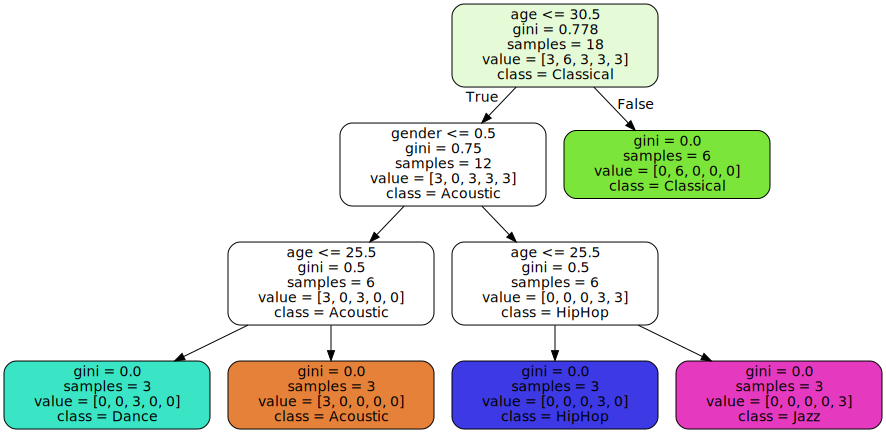

In [12]:
#Visualize decision tree
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(model, out_file=None, feature_names=['age', 'gender'],
                                class_names=sorted(y.unique()),
                                label='all', rounded=True, filled=True, fontname="monaco")
graph = graphviz.Source(dot_data)
graph